# Titanic – Data Exploration & Visualisations

In [1]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd
sns.set_theme(style='whitegrid')
df = sns.load_dataset('titanic')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1 Passenger-class distribution

/tmp/ipython-input-2-2110644393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pclass', palette='viridis')


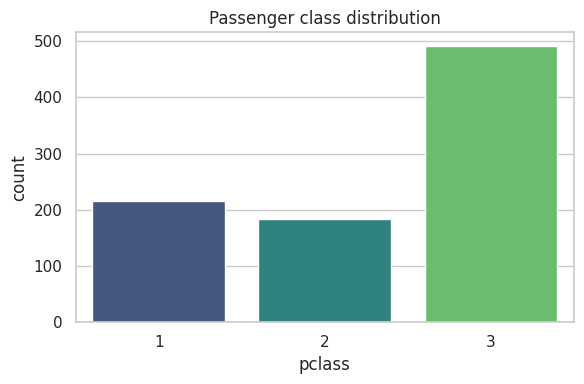

In [2]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pclass', palette='viridis')
plt.title('Passenger class distribution')
plt.tight_layout(); plt.show()

## 2 Survival rate by Sex × Pclass

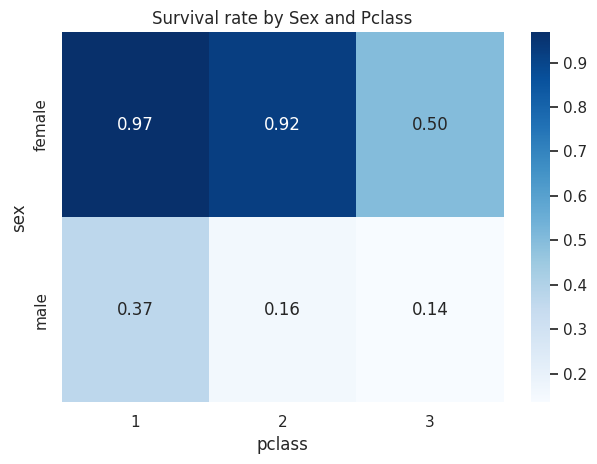

In [3]:
pivot = pd.crosstab(df['sex'], df['pclass'], df['survived'], aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Blues')
plt.title('Survival rate by Sex and Pclass'); plt.tight_layout(); plt.show()

## 3 Age distribution (survived vs not)

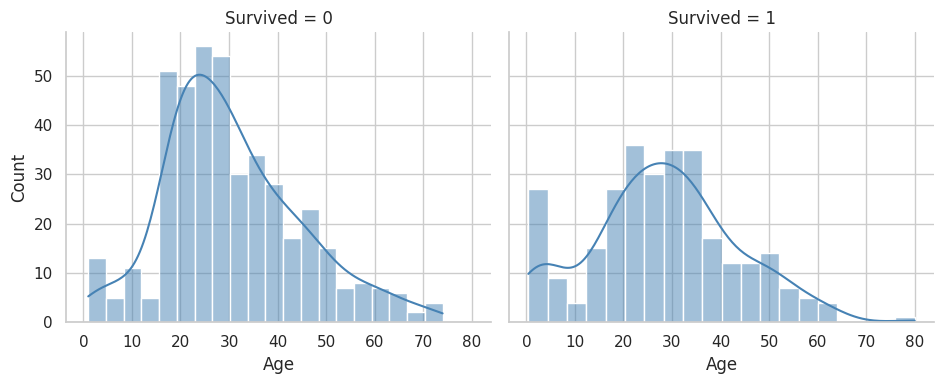

In [4]:
g = sns.FacetGrid(df, col='survived', height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x='age', bins=20, kde=True, color='steelblue')
g.set_titles(col_template='Survived = {col_name}'); g.set_axis_labels('Age','Count'); plt.tight_layout()

## 4 Fare distribution by class (log scale)

/tmp/ipython-input-5-2640657906.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pclass', y='fare', palette='Set2')


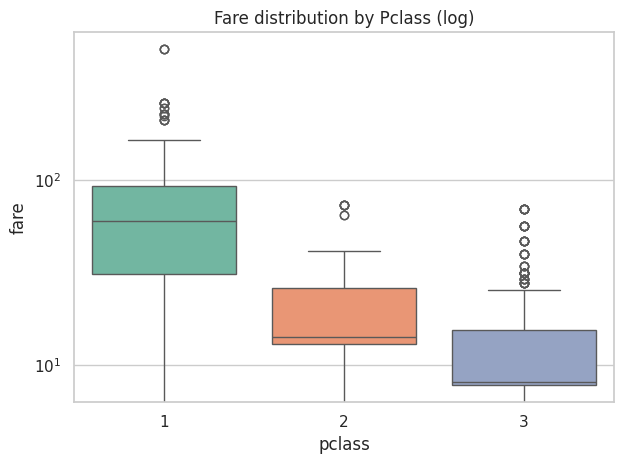

In [5]:
sns.boxplot(data=df, x='pclass', y='fare', palette='Set2')
plt.yscale('log'); plt.title('Fare distribution by Pclass (log)'); plt.tight_layout(); plt.show()

## 5 Embarkation ports

/tmp/ipython-input-6-2402443794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='embarked', palette='pastel')


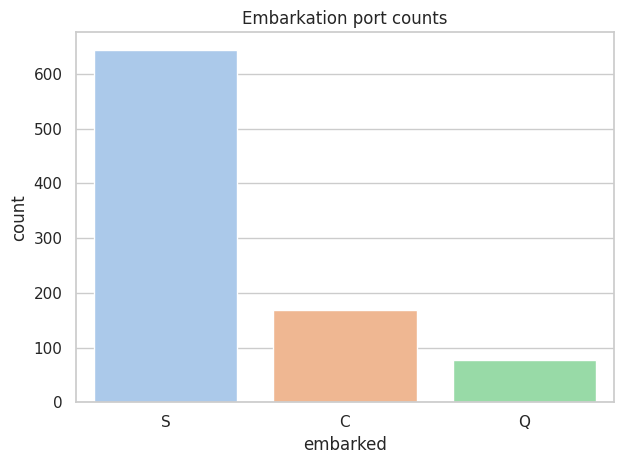

In [6]:
sns.countplot(data=df, x='embarked', palette='pastel')
plt.title('Embarkation port counts'); plt.tight_layout(); plt.show()

## 6 Family size distribution

/tmp/ipython-input-7-2445510218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fs, x='family_size', palette='crest')


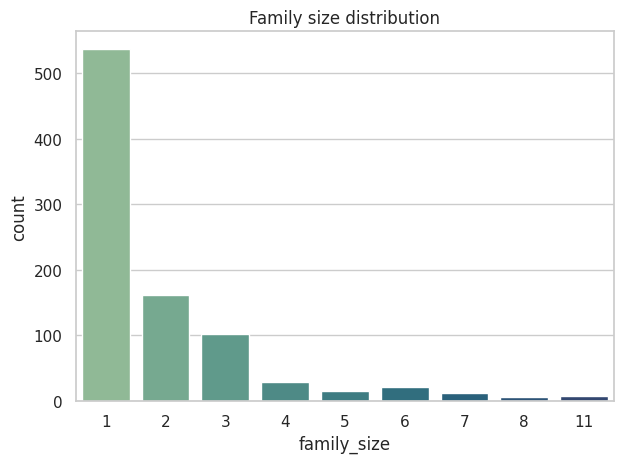

In [7]:
df_fs = df.copy(); df_fs['family_size'] = df_fs['sibsp'] + df_fs['parch'] + 1
sns.countplot(data=df_fs, x='family_size', palette='crest')
plt.title('Family size distribution'); plt.tight_layout(); plt.show()

## 7 Numeric correlation heat-map

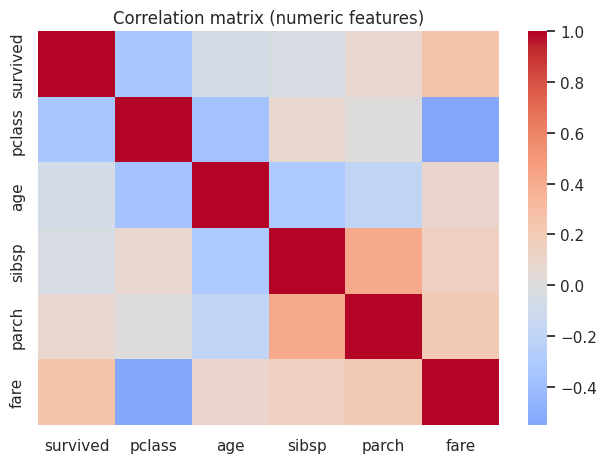

In [8]:
numeric = df.select_dtypes('number')
sns.heatmap(numeric.corr(), cmap='coolwarm', center=0)
plt.title('Correlation matrix (numeric features)'); plt.tight_layout(); plt.show()